In [60]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,f1_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,mean_squared_error, ConfusionMatrixDisplay


In [ ]:
#importing the dataset 
data=pd.read_csv("D:\ML\ML Assignment\Global_Pollution_Analysis.csv")
df=pd.DataFrame(data)
print(df.head)

<bound method NDFrame.head of           Country  Year  Air_Pollution_Index  Water_Pollution_Index  \
0         Hungary  2005               272.70                 124.27   
1       Singapore  2001                86.72                  60.34   
2         Romania  2016                91.59                  83.36   
3    Cook Islands  2018               280.61                  67.16   
4        Djibouti  2008               179.16                 127.53   
..            ...   ...                  ...                    ...   
195        Latvia  2004               115.84                  78.75   
196    Bangladesh  2002               121.82                 120.97   
197         Korea  2011               149.73                 146.92   
198       Vanuatu  2002               237.20                 113.63   
199       Croatia  2010               135.50                 158.43   

     Soil_Pollution_Index  Industrial_Waste (in tons)  \
0                   51.95                    94802.83   
1  

In [3]:
#handing the missing value
print(df.isnull().sum())
#checking for duplicated values
print("Number of duplicate rows:", df.duplicated().sum())


Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Rec   overed (in GWh)              0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64
Number of duplicate rows: 0


In [4]:
# data transfomation
print(df.columns)

print(df[['Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index']])

# Normalize 
pollution_col=df[['Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index']]

scaler=StandardScaler()
normalize_col=scaler.fit_transform(pollution_col)
print(normalize_col)

Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Rec   overed (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')
     Air_Pollution_Index  Water_Pollution_Index  Soil_Pollution_Index
0                 272.70                 124.27                 51.95
1                  86.72                  60.34                117.22
2                  91.59                  83.36                121.72
3                 280.61                  67.16                 93.58
4                 179.16                 127.53                121.55
..                   ...                    ...                   ...
195               115.84                  78.75                 42.34
196               121.82                

In [5]:

df_encoded=pd.get_dummies(df,columns=['Country', 'Year'],drop_first=True,dtype=int)
print(df_encoded.columns)

print(df_encoded[['Country_Singapore', 'Year_2011']])

Index(['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
       'Industrial_Waste (in tons)', 'Energy_Rec   overed (in GWh)',
       'CO2_Emissions (in MT)', 'Renewable_Energy (%)',
       'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       ...
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019'],
      dtype='object', length=204)
     Country_Singapore  Year_2011
0                    0          0
1                    1          0
2                    0          0
3                    0          0
4                    0          0
..                 ...        ...
195                  0          0
196                  0          0
197                  0          1
198                  0          0
199                  0          0

[200 rows x 2 columns]


In [6]:
print(df_encoded[["CO2_Emissions (in MT)","Industrial_Waste (in tons)"]].describe())
print(df_encoded[["CO2_Emissions (in MT)","Industrial_Waste (in tons)"]].isnull().sum())

numeric_features = df[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
                       'Energy_Consumption_Per_Capita (in MWh)', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']]

corr=numeric_features.corr()
print(corr)

 

       CO2_Emissions (in MT)  Industrial_Waste (in tons)
count             200.000000                   200.00000
mean               24.878100                 52891.68150
std                14.470892                 27224.49169
min                 1.920000                  1019.37000
25%                11.220000                 31201.97250
50%                25.355000                 55299.15000
75%                38.550000                 74805.82500
max                49.690000                 99739.36000
CO2_Emissions (in MT)         0
Industrial_Waste (in tons)    0
dtype: int64
                                        Air_Pollution_Index  \
Air_Pollution_Index                                1.000000   
Water_Pollution_Index                             -0.022540   
Soil_Pollution_Index                               0.036020   
Energy_Consumption_Per_Capita (in MWh)            -0.053284   
CO2_Emissions (in MT)                             -0.038179   
Industrial_Waste (in tons)      

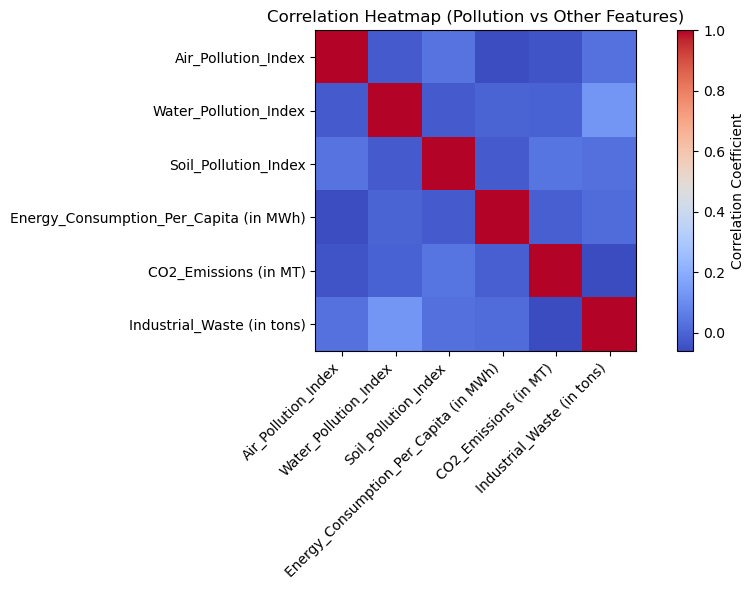

In [16]:
numeric_df = df.select_dtypes(include=['number'])
if 'Pollution_Level' in corr.columns:
    print("Correlation with Pollution_Level:\n")
    print(corr['Pollution_Level'].sort_values(ascending=False))

# --- Visualization: Heatmap ---
plt.figure(figsize=(10, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')

# Add labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap (Pollution vs Other Features)')
plt.tight_layout()
plt.show()

Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Rec   overed (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)', 'Energy_Recovery_Rate', 'labelled_data',
       'pollution_level'],
      dtype='object')


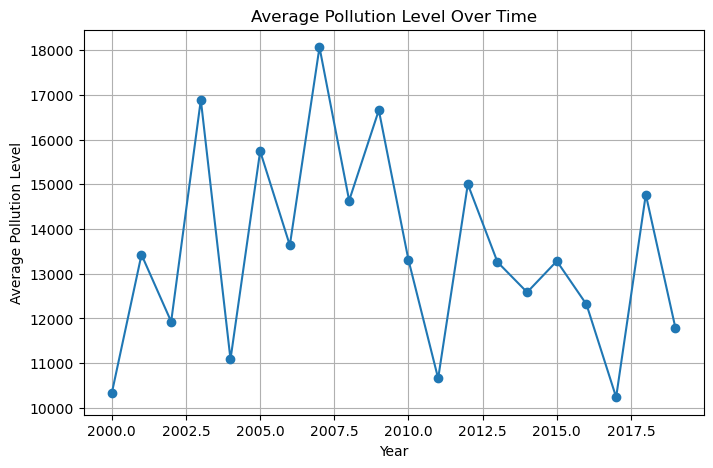

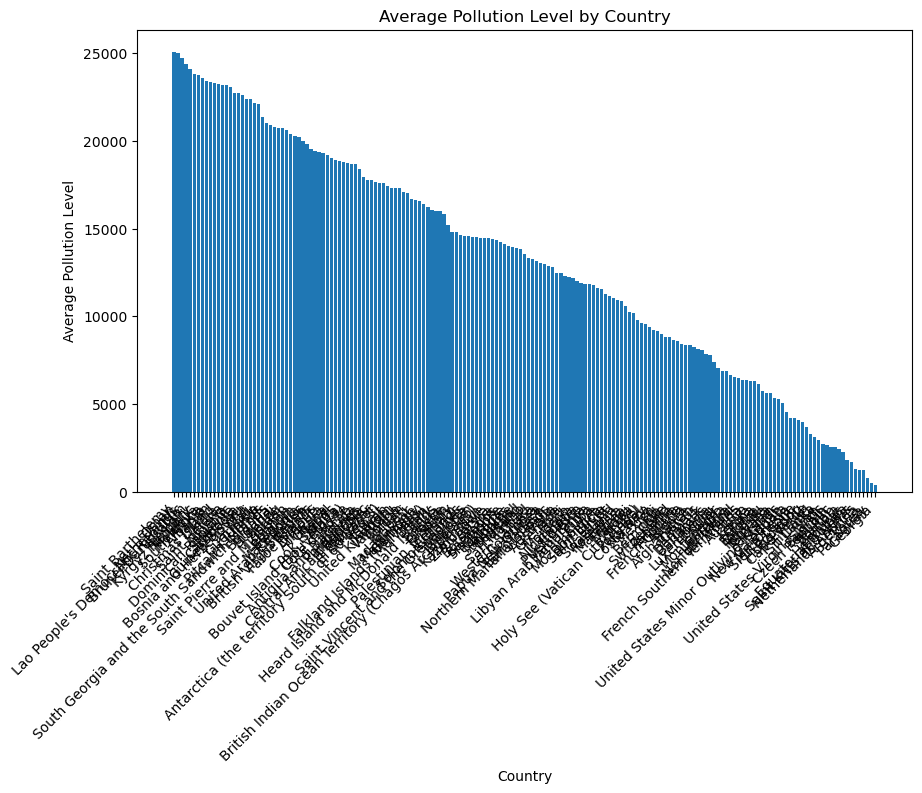

C:\Users\Acer\AppData\Local\Temp\ipykernel_19800\623690959.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=countries, patch_artist=True)


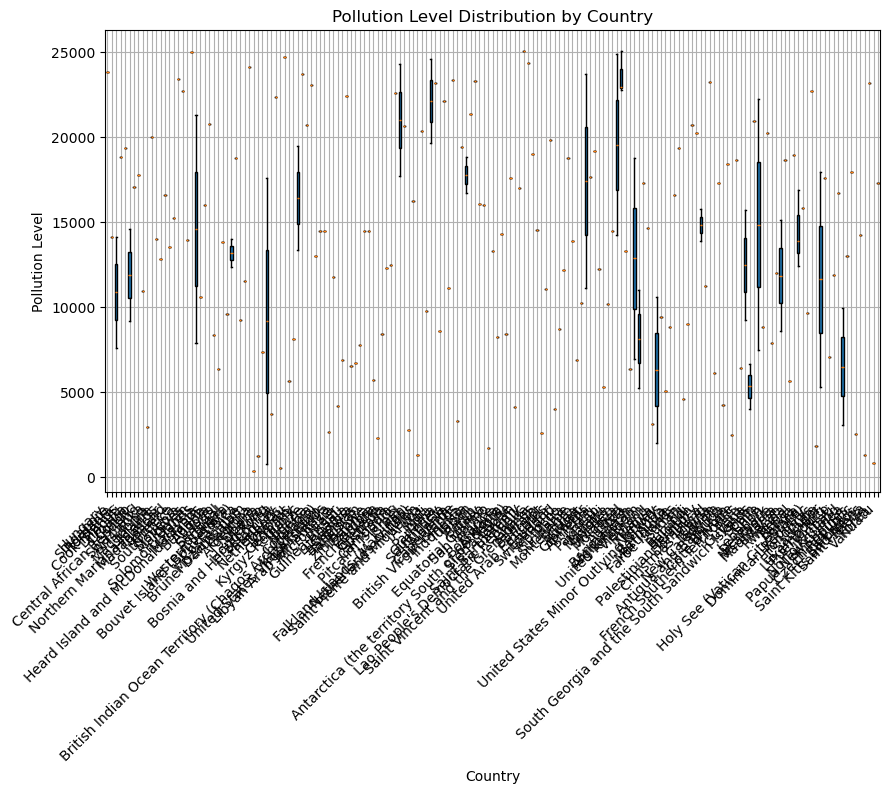

In [ ]:
print(df.columns)
df['Pollution_Level'] = df[['Air_Pollution_Index', 
                            'Water_Pollution_Index', 
                            'Soil_Pollution_Index', 
                            'Industrial_Waste (in tons)']].mean(axis=1)

plt.figure(figsize=(8,5))
df.groupby('Year')['Pollution_Level'].mean().plot(marker='o')
plt.title('Average Pollution Level Over Time')
plt.xlabel('Year')
plt.ylabel('Average Pollution Level')
plt.grid(True)
plt.show()

#Pollution Comparison Across Countries (bar Chart) 
plt.figure(figsize=(10,6))
country_mean = df.groupby('Country')['Pollution_Level'].mean().sort_values(ascending=False)
plt.bar(country_mean.index, country_mean.values)
plt.title('Average Pollution Level by Country')
plt.xlabel('Country')
plt.ylabel('Average Pollution Level')
plt.xticks(rotation=45, ha='right')
plt.show()

#  Distribution of Pollution Levels (Box Plot
plt.figure(figsize=(10,6))
countries = df['Country'].unique()
data = [df[df['Country'] == c]['Pollution_Level'] for c in countries]

plt.boxplot(data, labels=countries, patch_artist=True)
plt.title('Pollution Level Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Pollution Level')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [7]:
# feature engineering
print(df.columns)
df['Energy_Recovery_Rate'] = (df['Energy_Rec   overed (in GWh)'] / df['Industrial_Waste (in tons)']) * 100
print(df['Energy_Recovery_Rate'])

Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Rec   overed (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')
0       0.166809
1       0.884871
2       0.870147
3       0.193923
4       0.052536
         ...    
195     0.164090
196     0.034661
197    10.403888
198     0.444544
199     0.476032
Name: Energy_Recovery_Rate, Length: 200, dtype: float64


In [25]:
print(df[['Energy_Rec   overed (in GWh)',
          'Air_Pollution_Index',
          'CO2_Emissions (in MT)',
          'Industrial_Waste (in tons)']].describe())
print(df.isnull().sum())
corr = df.corr(numeric_only=True)
print(corr['Energy_Rec   overed (in GWh)'].sort_values(ascending=False))



       Energy_Rec   overed (in GWh)  Air_Pollution_Index  \
count                    200.000000            200.00000   
mean                     260.448700            180.62695   
std                      147.141923             67.07331   
min                       11.730000             50.30000   
25%                      118.355000            134.97250   
50%                      273.140000            183.38500   
75%                      384.957500            237.42500   
max                      499.980000            297.95000   

       CO2_Emissions (in MT)  Industrial_Waste (in tons)  
count             200.000000                   200.00000  
mean               24.878100                 52891.68150  
std                14.470892                 27224.49169  
min                 1.920000                  1019.37000  
25%                11.220000                 31201.97250  
50%                25.355000                 55299.15000  
75%                38.550000                 7

In [23]:
# linear Regression
x=df[[ 'Air_Pollution_Index',
    'CO2_Emissions (in MT)',
    'Industrial_Waste (in tons)',
    'Plastic_Waste_Produced (in tons)',
    'Renewable_Energy (%)',
    'Energy_Consumption_Per_Capita (in MWh)',
    'GDP_Per_Capita (in USD)']]
y=df['Energy_Recovery_Rate']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
Model=LinearRegression()
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print(r2_score(y_test,pred))



-1.5822191277812072


In [42]:
# Calculate the mean population
mean_population = df['Population (in millions)'].mean()

print("Mean population:", mean_population)
print("Min population:", df['Population (in millions)'].min())
print("Max population:", df['Population (in millions)'].max())
print("Count above mean:", (df['Population (in millions)'] > mean_population).sum())
print("Total rows:", len(df))

# Label data based on comparison with the mean
df['pollution_level'] = np.where(df['Population (in millions)'] > mean_population, 'High', 'Low')

# ✅ Print correct column (labelled_data)
print(df[['Population (in millions)', 'pollution_level']].head(20))


Mean population: 104.27130000000001
Min population: 2.32
Max population: 198.82
Count above mean: 101
Total rows: 200
    Population (in millions) pollution_level
0                      42.22             Low
1                     137.25            High
2                     124.47            High
3                      67.80             Low
4                     186.52            High
5                     103.43             Low
6                     182.09            High
7                      73.43             Low
8                      11.26             Low
9                      77.21             Low
10                     93.61             Low
11                      9.13             Low
12                     73.92             Low
13                    129.99            High
14                    141.27            High
15                    112.59            High
16                    154.94            High
17                     28.54             Low
18                     67.6

In [ ]:
X=df[['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index','Industrial_Waste (in tons)','CO2_Emissions (in MT)','Plastic_Waste_Produced (in tons)']]

Y=df['pollution_level']


#split data 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#training model
model=LogisticRegression(multi_class='multinomial')
model.fit(X_train,Y_train)
ypred=model.predict(X_test)
f1 = f1_score(Y_test, ypred,pos_label='High')
acruracy=accuracy_score(Y_test,ypred)
precision=precision_score(Y_test,ypred,pos_label='High')
print("F1 score",f1)
print("Accuracy",acruracy)
print("Precision",precision)
print(classification_report(Y_test,ypred))


F1 score 0.358974358974359
Accuracy 0.375
Precision 0.35
              precision    recall  f1-score   support

        High       0.35      0.37      0.36        19
         Low       0.40      0.38      0.39        21

    accuracy                           0.38        40
   macro avg       0.38      0.37      0.37        40
weighted avg       0.38      0.38      0.38        40



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
# Model Evaluation and Comparison
#linear model
R2=r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)
# Logistic Regression Model
f1 = f1_score(Y_test, ypred,pos_label='High')
acruracy=accuracy_score(Y_test,ypred)
precision=precision_score(Y_test,ypred,pos_label='High')

# prints
print("r2 score of linear model",R2)
print("Mean Squared_error(linear Model)",mse)
print("F1 score of Logistic Regression Model",f1)
print("Accuracy of Logistic Regression Model",acruracy)
print("Precision of Logistic Regression Model",precision)

r2 score of linear model -1.5822191277812072
Mean Squared_error(linear Model) 2.1368399731419325
F1 score of Logistic Regression Model 0.358974358974359
Accuracy of Logistic Regression Model 0.375
Precision of Logistic Regression Model 0.35


Confusion Matrix:
 [[ 7 12]
 [13  8]]

Classification Report:
              precision    recall  f1-score   support

        High       0.35      0.37      0.36        19
         Low       0.40      0.38      0.39        21

    accuracy                           0.38        40
   macro avg       0.38      0.37      0.37        40
weighted avg       0.38      0.38      0.38        40



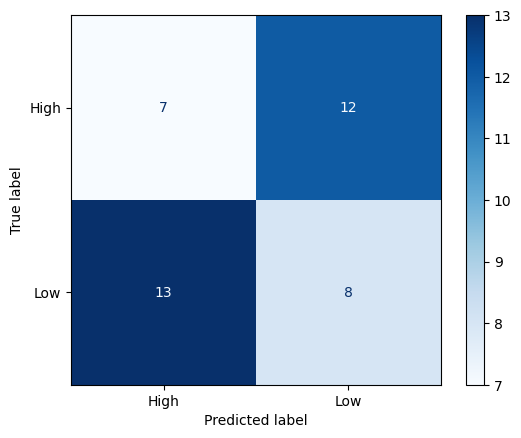

In [62]:
cm = confusion_matrix(Y_test, ypred)
print("Confusion Matrix:\n", cm)

# Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')

print("\nClassification Report:")
print(classification_report(Y_test, ypred))

Final Summary 

This project looked at how different pollution levels affect how well countries recover energy from waste.

The results show that countries with high air, water, and soil pollution usually have lower energy recovery, meaning they aren’t converting waste into usable energy effectively.

Countries with moderate pollution levels tend to perform better because they often have stronger recycling systems and better waste management practices.

Model Results:

Logistic Regression Model: Accuracy – 37.5%, Precision – 0.35, F1 Score – 0.36

Linear Regression Model: R² Score – -1.58, Mean Squared Error – 2.13

These results show that the models are not very accurate yet, but they still help reveal important trends. With better data and tuning, performance could improve.

Key Insight: High-pollution countries are losing potential energy because their waste isn’t being managed or converted efficiently.

Recommendations:

Focus on improving energy recovery in high-pollution, low-performance countries.

Invest in clean energy technologies and upgrade recycling infrastructure.

Apply stronger pollution control policies to reduce waste and boost energy recovery.

In short, improving how waste is managed and converted into energy can help reduce pollution, increase sustainability, and create cleaner, more energy-efficient environments.